# Get and explore dataset

In [16]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import tensorflow as tf
from tensorflow import keras

import numpy as np
import statistics
import re
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [2]:
# Make results reproducible - set random seed
from numpy.random import seed
seed(42)

In [3]:
negative_file = "negative.txt"
positive_file = "positive.txt"

In [4]:
# Do not modify - helper function to load and preprocess data
def filter_words(line):    
    line = re.sub(r'[^\w\s]','',line.rstrip())
    words = line.split(" ") 
    words = [i.lower() for i in words if i]      
    return " ".join(words)

def load_data(filename):
    thefile = open(filename, 'r') 
    lines = thefile.readlines() 

    data = []
    for l in range(0,len(lines)): 
        if(lines[l-1].strip() == "<title>"): 
            theline = filter_words(lines[l])
            if(len(theline) < 50):
                data.append(theline)            
            
    return data

# Helper function to convert categorical data to class label
def to_word_label(y):
    y = to_class(y)   
    return ["positive" if i==0 else "negative" for i in y]

# Helper function to convert class label to numeric label
def to_numeric_label(y):
  return [0 if i=="positive" else 1 for i in word_labels]

# Helper function: this function needs to be called before sending arrays to sklearn metrics,
# it converts back to class form from categorical form. ie: [1,0] --> 0, [0,1] --> 1
def to_class(y):
    return np.argmax(y,axis=1) 

In [5]:
positive = load_data(positive_file)
negative = load_data(negative_file)

print(positive[0:10])
print(negative[0:10])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book', 'to the point and beautifully illustrated', 'at least somebody has got it', 'beautifully written heartwarming story', 'an excellent cookbook full of delicious recipes', 'an outstanding resource']
['horrible book horrible', 'shallow selfindulgence', 'horrible book horrible', 'disappointment', 'a disappointing mess', 'save your money there are better books out there', 'thank you but no thanks', 'unendurable', 'the hard way', 'some good info among the political commercial']


In [6]:
# Do not modify - Combines the positive and negative reviews into a single list and create labels
data = positive + negative
word_labels = ["positive"] * len(positive) + ["negative"] * len(negative) 

# Converts labels to numbers in one-hot encoding - [1, 0] (positive) or [0, 1] (negative)
from keras.utils import to_categorical
labels  = to_categorical(to_numeric_label(word_labels))

Reviews have a mean length of 24.676519799219186 characters and the std deviation of 11.287199941717205
Total no. of unique words: 2559 


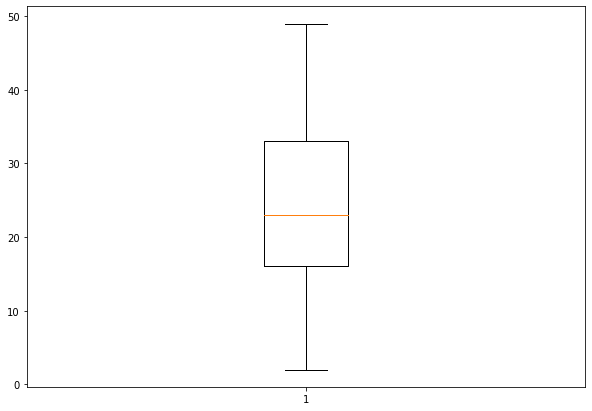

In [23]:
# Write some code to investigate the dataset. 
# - Calculate and report the mean review size, its standard deviation and create a boxplot.
# - Calculate the number of unique words in the dataset
# - Perform any other dataset investigation that you feel wouldpositive_file be valuable
rev_length = [] 

for x in data:
    rev_length.append(len(x))

list(map(int, rev_length))
rev_length_mean = statistics.mean(rev_length)
rev_length_std = statistics.stdev(rev_length)

print("Reviews have a mean length of {} characters and the std deviation of {}".format(rev_length_mean,rev_length_std))

word_list = ' '.join(data)

word_count = len(set(re.findall('\w+', word_list.lower())))

print("Total no. of unique words: {} ".format(word_count))
fig = plt.figure(figsize =(10, 7)) 
  
# Creating plot 
plt.boxplot(rev_length) 
  
# show plot 
plt.show() 

In [10]:
# Do not modify - Tokenize the vocabulary 
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=25)

tokenizer.fit_on_texts(data) #create the vocabularry

tokenized_data = tokenizer.texts_to_sequences(data) #tokenize the data using the vocabulary

vocab_size = len(tokenizer.word_index) + 1 

# Compare a sample of the data before and after tokenization
print(data[0:5])
print(tokenized_data[0:5])

['one of the best crichton novels', 'the medicine of the future', 'beautiful', 'for lovers of robicheaux', 'a good book']
[[18, 4, 2, 19], [2, 4, 2], [], [6, 4], [1, 12, 3]]


# Pre-processing

In [11]:
# Pre-processing
# Write some code to pre-process the data so that each review is the same length
padded = pad_sequences(sequences=tokenized_data, maxlen=round(rev_length_mean))

In [12]:
# Write some code to split the data into a training and test set. Make sure you shuffle the data. Use 20% for the test set.

X = padded
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=y, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=y, random_state=4)

In [29]:
# Fill in the following function so it
# - makes a prediction for the test set given the model
# - reports the precision, recall and f1 score. Also print the confusion matrix. 
# You will need to use the helper to_class function to convert y_pred and y_test before supplying them to the sklearn functions.

def assess_model(model, X_test, y_test):      
    #To do
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(26, 64, input_length=round(rev_length_mean)))
    model.compile('rmsprop', 'mse')
    y_pred = model.predict(X_test)
   

    disp = metrics.plot_confusion_matrix(model, X_test, y_test.to_class)
    disp.figure_.suptitle("Confusion Matrix")
    
    plt.show()
    print(metrics.classification_report(y_test.to_class, y_pred.to_class))

# Build and tune model

Define network architecture

In [14]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(26, 64, input_length=round(rev_length_mean)))
model.compile('rmsprop', 'mse')

Train model

In [27]:
batch_size = 128
num_epochs = 10

# Compiling the model 
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])


model.fit(x=X_test, 
          y=y_test, 
          batch_size=batch_size, 
          epochs=num_epochs, 
          validation_data=(X_val, y_val))

print('Training complete')

AttributeError: module 'tensorflow._api.v2.train' has no attribute 'AdamOptimizer'

Examine performance of model

In [17]:
assess_model(model, X_test, y_test)

metric_values = model.evaluate(x=X_test, y=y_test)

print('TEST performance')
for metric_value, metric_name in zip(metric_values, model.metrics_names):
  print('{}: {}'.format(metric_name, metric_value))

NameError: name 'metrics' is not defined

Plot graphs for accuracy and loss

In [22]:
loss_train = model.history['train_loss']
loss_val = model.history['val_loss']
epochs = range(1,35)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

TypeError: 'NoneType' object is not subscriptable

# Make a prediction

In [33]:
# This is a very small set of completed new data to use to make predictions.
prediction_data = ["this book is fabulous","i hated this book", "the best", "no good", "okay"]
tokenized = tokenizer.texts_to_sequences(prediction_data)
padded = pad_sequences(tokenized, padding='post', maxlen=maxlen)

# Supply this data to each of your models and see how it does. 
# You can call the helper function "to_word_label" to map the output of the model to the name of the
# class it was predicted to belong to.

assess_model(model, tokenized, padded)



NameError: name 'maxlen' is not defined